## word2vec implementation with Python (& Gensim)


In [4]:
import re
import numpy as np

from gensim.models import Word2Vec
from nltk.corpus import gutenberg
from multiprocessing import Pool
from scipy import spatial
import nltk
nltk.download('punkt')
nltk.download('gutenberg')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

### Import training dataset
- Import Shakespeare's Hamlet corpus from nltk library

In [0]:
sentences = list(gutenberg.sents('shakespeare-hamlet.txt'))   # import the corpus and convert into a list

In [6]:
print('Type of corpus: ', type(sentences))
print('Length of corpus: ', len(sentences))

Type of corpus:  <class 'list'>
Length of corpus:  3106


In [7]:
print(sentences[0])    # title, author, and year
print(sentences[1])
print(sentences[10])

['[', 'The', 'Tragedie', 'of', 'Hamlet', 'by', 'William', 'Shakespeare', '1599', ']']
['Actus', 'Primus', '.']
['Fran', '.']


### Preprocess data
- Use re module to preprocess data
- Convert all letters into lowercase
- Remove punctuations, numbers, etc.

In [0]:
for i in range(len(sentences)):
    sentences[i] = [word.lower() for word in sentences[i] if re.match('^[a-zA-Z]+', word)]  

In [9]:
print(sentences[0])    # title, author, and year
print(sentences[1])
print(sentences[10])

['the', 'tragedie', 'of', 'hamlet', 'by', 'william', 'shakespeare']
['actus', 'primus']
['fran']


### Create and train model
- Create a word2vec model and train it with Hamlet corpus
- Key parameter description (https://radimrehurek.com/gensim/models/word2vec.html)
    - **sentences**: training data (has to be a list with tokenized sentences)
    - **size**: dimension of embedding space
    - **sg**: CBOW if 0, skip-gram if 1
    - **window**: number of words accounted for each context (if the window size is 3, 3 word in the left neighorhood and 3 word in the right neighborhood are considered)
    - **min_count**: minimum count of words to be included in the vocabulary
    - **iter**: number of training iterations
    - **workers**: number of worker threads to train

In [0]:
model = Word2Vec(sentences = sentences, size = 100, sg = 1, window = 3, min_count = 1, iter = 10, workers = Pool()._processes)

In [0]:
model.init_sims(replace = True) #If True - forget the original vectors and only keep the normalized ones = saves lots of memory!

### Save and load model
- word2vec model can be saved and loaded locally
- Doing so can reduce time to train model again

In [12]:
model.save('word2vec_model')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [13]:
model = Word2Vec.load('word2vec_model')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


### Similarity calculation
- Similarity between embedded words (i.e., vectors) can be computed using metrics such as cosine similarity
- For other metrics and comparisons between them, refer to: https://github.com/taki0112/Vector_Similarity

In [14]:
model.most_similar('hamlet')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('horatio', 0.9985255599021912),
 ('ophelia', 0.998100996017456),
 ('laertes', 0.9980080723762512),
 ('ghost', 0.9979547262191772),
 ('sweet', 0.9977491497993469),
 ('noble', 0.9977054595947266),
 ('heere', 0.9977020025253296),
 ('queene', 0.9976681470870972),
 ('grace', 0.9976334571838379),
 ('gertrude', 0.9976204037666321)]

In [15]:
v1 = model['mother']
v2 = model['queen']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [0]:
# define a function that computes cosine similarity between two words
def cosine_similarity(v1, v2):
    return 1 - spatial.distance.cosine(v1, v2)

In [17]:
cosine_similarity(v1, v2)

0.9955527186393738

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_with_labels(low_dim_embs, labels):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  #in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i,:]
        plt.scatter(x, y)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')


vocab = list(model.wv.vocab)
X = model[vocab]
from  sklearn.manifold import TSNE
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


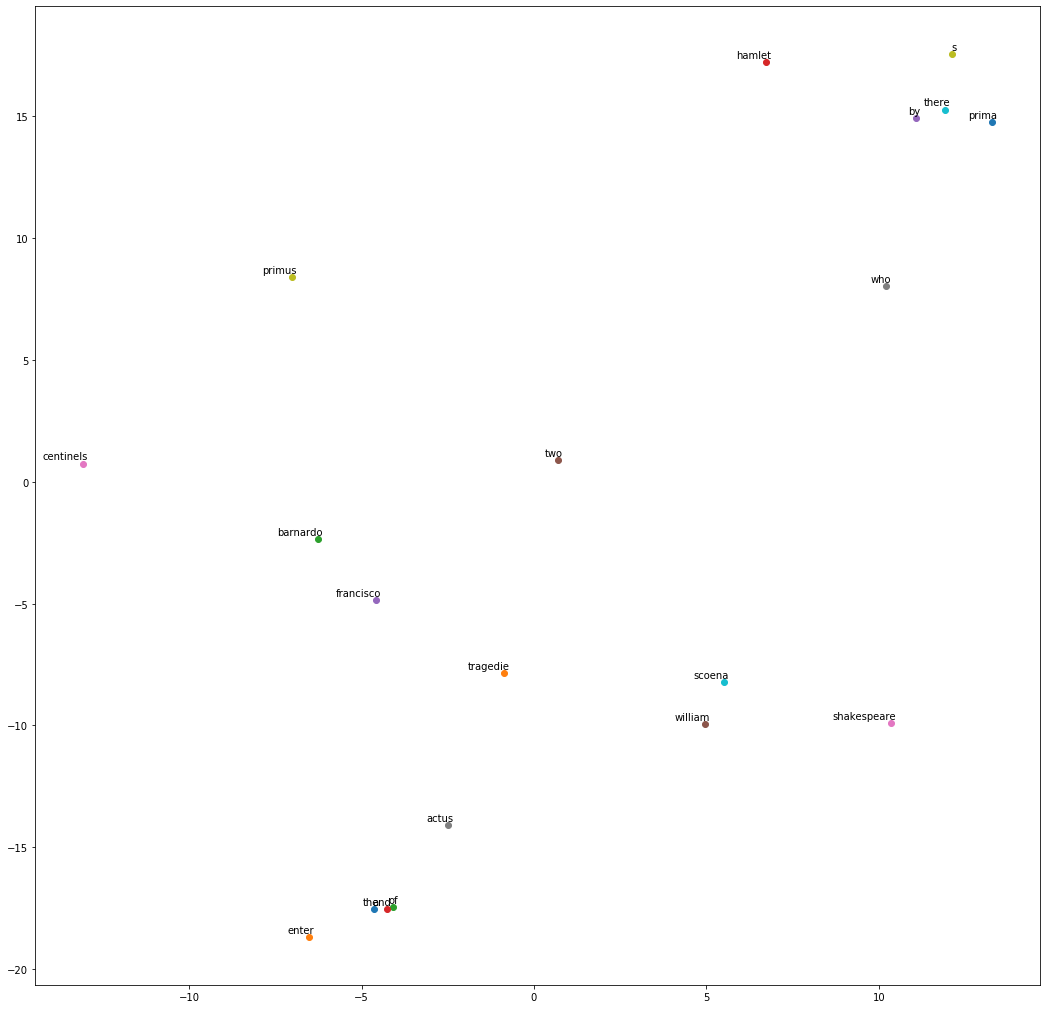

In [19]:

plot_only = 20
low_dim_embs = tsne.fit_transform(X)

labels = [vocab[i] for i in range(plot_only)]

low_dim_embs.shape


plot_with_labels(low_dim_embs, labels)